<a href="https://colab.research.google.com/github/prachuryanath/TF-Learning/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplfy it; predicting a numerical variable based on some other combination of variables, even shorter ... predicting a number.

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.4.1


### Creating data to view and fit

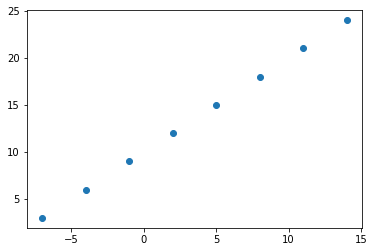

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualise it
plt.scatter(X,y)

### Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant ([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with Tensorflow

1. **Creating a model** - *define the input and output layers, as well as the hidden layers of a deep learning model.*
2. **Compiling a model** - *define the loss function( in other words, the function which tells our model how wrong it is ) and the optimizer ( tells our model how to improve the patterns in its learning ) and evaluation metrics ( what we can use to interpret the performance of our model).*
3. **Fitting a model** - *letting the model try to find patters between X & y(features and labels)* 

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs= 5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
model.predict([8.0])

array([[6.0104804]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units ( all called neurons) withing each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longerr) or on more data( give the model more examples to learn from)

In [ ]:
# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(X, y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 214ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6

In [ ]:
# Let's see if our model's predicton has improved ...
model.predict([8.0])

array([[14.431991]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 314ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.5062 - mae: 11.5062
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6739 - mae: 10.6739
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 9.8419 - mae: 9.8419
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 8.9961 - mae: 8.9961
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 8.1346 - mae: 8.1346
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4052 - mae: 7.4052
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 6.6763 - mae: 6.6763
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 5.9140 - mae: 5.9140
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 5.1124 - mae: 5.1124
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss:

In [ ]:
model.predict([8.0])

array([[18.031555]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural network is :
```
Build a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it -> Tweak it ...
```

When it comes to evaluation... there are 3 words you should memorize :

`"Visualize Visualize Visualize"`

It's a good idea to visualize :
* The data -  what data are we working with ? What does it look like ?
* The model itself - what does our model look like ?
* The training of a model - how does a model perform while it learns ?
* The predictions of the model - how do the predictions of a model line up against the ground truth ( the original labels )?






In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

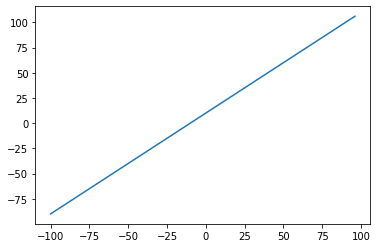

In [ ]:
# Visualze the plot
import matplotlib.pyplot as plt

plt.plot(X,y)

### The 3 sets...

* **Training set** - *the model learns from this data, which is typically 70-80% of the total data available.*
* **Validation set** -*the model gets tuned on this data, which is typically 10-15% of the data available.*
* **Test set** *- the model gets evaluated on this data to test what it has learnt, this set is typically 10-15% of the total data available.*

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40]  # 80% of the data
y_train = y[:40]  # 80% of the data

X_test = X[40:]   # 20% of the data
y_test = y[40:]   # 20% of the data

### Visualizing the data

Now we've got our data in training and test sets... let's visualise it again !

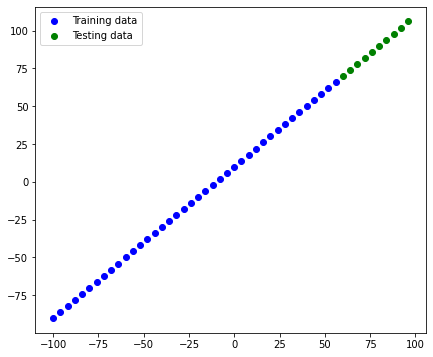

In [ ]:
plt.figure(figsize=(7,6))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot training data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs= 100)

### Visualizing our model

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name = "model_1")

# Compile the model
model.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params : total parameters in the model
* Trainable parameters : these are the parameters(patterns) the model can update as it trains
* Non-trainable : these parameters aren't updated during training ( this is typical when you bring parameters from other models during **transfer learning**)

In [ ]:
# Fit the model
model.fit(X_train, y_train, epochs= 100, verbose=0)

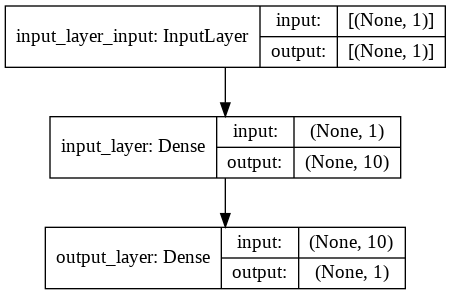

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred, y_test

(array([[ 70.55221 ],
        [ 75.13992 ],
        [ 79.72765 ],
        [ 84.31538 ],
        [ 88.9031  ],
        [ 93.49082 ],
        [ 98.07855 ],
        [102.666275],
        [107.254005],
        [111.84173 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

**Note** : If you feel like you're going to reuse some kind of functionality in the future, it's a good idea tu turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=X_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels, c="b", label="Training data")
  # Plot training data in green
  plt.scatter(test_data,test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show a legend
  plt.legend();

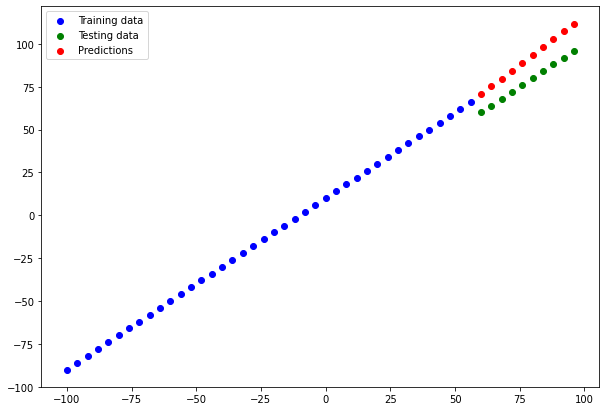

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics :
* MAE - mean average error, "on average, how wrong is each of my model's predictions."
* MSE - mean square error, "square the average errors"


In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 104ms/step - loss: 3.1970 - mae: 3.1970


[3.1969642639160156, 3.1969642639160156]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558233, 14.116046, 11.708939, 10.336925, 10.      , 10.698164,
       12.447131, 15.33302 , 19.254005, 23.841728], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55221 ,  75.13992 ,  79.72765 ,  84.31538 ,  88.9031  ,
        93.49082 ,  98.07855 , 102.666275, 107.254005, 111.84173 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969643>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.0703>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

```
Build a model -> Fit it -> Evaluate it -> Tweak it -> Fit it -> Evaluate it -> Tweak it ...
```

1. Get more data - get more examples for your model to train on ( more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger(using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments :

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_1.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs= 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss:

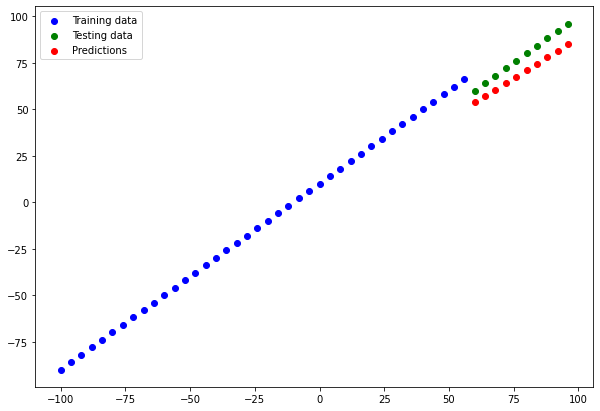

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_2.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mse"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs= 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 26.8627 - mse: 1015.8977
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.4175 - mse: 767.5333
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 31.5187 - mse: 1433.3077
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8490 - mse: 1141.6676
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 14.6465 - mse: 267.4541
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.9682 - mse: 169.5530
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0874 - mse: 141.6589
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.3978 - mse: 167.3422
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 42.4087 - mse: 2772.5435
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 28.3537 - mse: 1129.8184
Epoch 11/100
2/2 [==========================

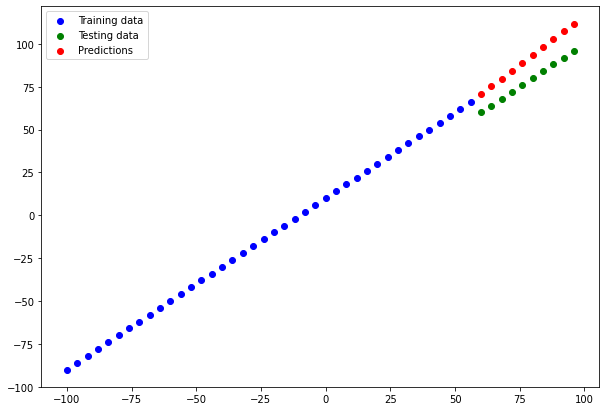

In [ ]:
# Make and plot
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969643>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.0703>)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs= 500)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 26.8627 - mae: 26.8627
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 24.4175 - mae: 24.4175
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 31.5187 - mae: 31.5187
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.8490 - mae: 27.8490
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.6465 - mae: 14.6465
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.9682 - mae: 11.9682
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0874 - mae: 11.0874
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.3978 - mae: 11.3978
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 42.4087 - mae: 42.4087
Epoch 10/500
2/2 [==============================] - 0s 11ms/step - loss: 28.3537 - mae: 28.3537
Epoch 11/500
2/2 [==============================] - 0s 4ms

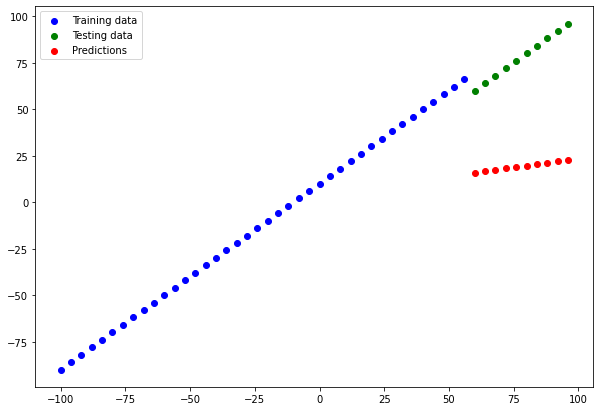

In [ ]:
# Make and plot
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71362>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0283>)

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas dataframe
import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,3.196964,13.070300
2,model_3,68.713623,4808.028320


Looks like `model_2` performed best...

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Tracking your experiments

One really good habit in machine learning modelling is to track the results of experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us !

**Resource** : As you build more models, you'll want to look into using :
* TensorBoard - a component of the TensorFlow library to help track modelling experiments.
* Weights & Biases - a tool for tracking all kinds of machine learning experiments ( plugs straight into TensorBoard).

 ### Saving our models

 Saving our models allow us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

 There are two main formats we can save our model's too :
 
 1. The SavedModel format
 2. The HDF5 format

In [ ]:
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
model_2.save("best_model_hdf5_format.h5")

### Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('/content/best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Compare the MAE of model_2_preds and loaded_SavedModel_preds
mae(y_true = y_test,y_pred=model_2_preds) == mae(y_true = y_test,y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

### Download a model(or any other file) from Google Colab

1. You can go the "files" tab and right click on the file you're after and click 'download'.
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/model.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_hdf5_format.h5 /content/drive/MyDrive

In [ ]:
!ls /content/drive/MyDrive

'1913032 MIM.pdf'
 1913032.pdf
 2013024_PARBATI_KUMARI_DAS.gdoc
 2013024_PARBATI_KUMARI_DAS.pdf
'2013086_Rituporna Das.gdoc'
'2013086_Rituporna Das.pdf'
 20210415_213024.jpg
'AE Lab 1913032 Prachurya Nath.pdf'
'AE Lab EXP3 1913032.pdf'
'AE Lab Exp4 1913032.pdf'
'AE Lab Exp5 1913032.pdf'
 best_model_hdf5_format.h5
 Christmas.gdoc
 Classroom
 COD.gform
'COD:M Tournament.gsheet'
'Colab Notebooks'
'Constitution Day.gdoc'
'Contact Information (1).gform'
'Contact Information.gform'
'DP 2 Relation to Industry.gdoc'
'DP 3 Background  Motivation.gdoc'
'DP 4 Literature Survey.gdoc'
'Electrical Facts.docx'
 EMFT.docx
'eoi-drvq-ikd - Dec 13, 2020.gjam'
'Event Registration (1).gform'
'Event Registration.gform'
 Exp10_2.gdoc
'EXP3 GR9 PSIM LAB REPORT.pdf'
'EXP5 GR9 PSL (1).pdf'
'EXP5 GR9 PSL.pdf'
 image_837b4184-ccca-45cf-9101-d548a0d5ed5420210414_184004.jpg
 IMG-20210123-WA0025.jpg
'Introduction Video '
'Meet Attendance 08 28 2020 (1).gsheet'
'Meet Attendance 08 28 2020.gsheet'
'MIM 1913032.pdf'
'N

## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7718.1916 - mae: 7718.1916
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 6983.7825 - mae: 6983.7825
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 8083.4820 - mae: 8083.4820
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7793.8447 - mae: 7793.8447
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7618.4113 - mae: 7618.4113
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7678.4979 - mae: 7678.4979
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7780.4289 - mae: 7780.4289
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7588.8132 - mae: 7588.8132
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7520.6834 - mae: 7520.68

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3267 - mae: 7023.3267


[7023.32666015625, 7023.32666015625]

Right now it looks like our model isn't performing too well... let's try and improve it !

To (try) improve our model, we'll run 2 experiments :

1. Add an extra layer with more hidden units and use the Adam optimizer.
2. Same as above but Train for longer (200 epochs)

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs= 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13251.7398 - mae: 13251.7398
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12768.7722 - mae: 12768.7722
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12248.2842 - mae: 12248.2842
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12353.0233 - mae: 12353.0233
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11243.3955 - mae: 11243.3955
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9718.5233 - mae: 9718.5233
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8354.8463 - mae: 8354.8463
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7732.2947 - mae: 7732.2947
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7537.6736 - mae: 7537.6736
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7652.7183 - mae:

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs= 500, verbose=0)

In [ ]:
# Evaluate the third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.0034 - mae: 3491.0034


[3491.00341796875, 3491.00341796875]

Text(0.5, 0, 'epochs')

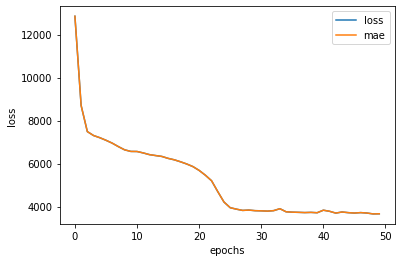

In [ ]:
# Plot history ( also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(500, activation=tf.keras.layers.LeakyReLU()),
  tf.keras.layers.Dense(400, activation=tf.keras.layers.LeakyReLU()),
  tf.keras.layers.Dense(300, activation=tf.keras.layers.LeakyReLU()),
  tf.keras.layers.Dense(200, activation=tf.keras.layers.LeakyReLU()),
  tf.keras.layers.Dense(100, activation=tf.keras.layers.LeakyReLU()),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae"])

# 3. Fit the model
history = insurance_model_4.fit(X_train, y_train, epochs= 1000, verbose=0)

In [ ]:
# Evaluate the fourth model
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1366.6139 - mae: 1366.6139


[1366.6138916015625, 1366.6138916015625]

Text(0.5, 0, 'epochs')

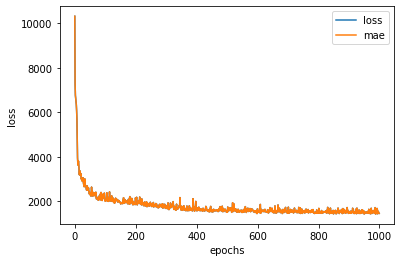

In [ ]:
# Plot history ( also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

* In terms of scaling values, neural networks tend to prefer normalization.
* If you're not sure on which to use, you should try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow a few classes from Scikit-learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now ?
X_train_normal 

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful ! Our data has been normalized and one hot encoded. Now let's build a neural network model on it

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_normal = tf.keras.Sequential([
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(400, activation="relu"),
  tf.keras.layers.Dense(300, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_normal.compile( loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae"])

# 3. Fit the model
history_normal = insurance_model_normal.fit(X_train_normal, y_train, epochs= 500, verbose=0)

In [ ]:
# Evaluate the normalized model
insurance_model_normal.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1476.7100 - mae: 1476.7100


[1476.7099609375, 1476.7099609375]

Text(0.5, 0, 'epochs')

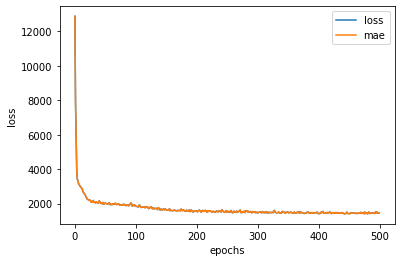

In [ ]:
# Plot history ( also known as a loss curve or a training curve)
pd.DataFrame(history_normal.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")